**Question 8a**

In [55]:
import numpy as np
from sklearn import metrics
from scipy.io import loadmat
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [4]:
mdic = loadmat("hw02_dataset.mat")

In [5]:
X_trn = mdic["X_trn"]
X_tst = mdic["X_tst"]
Y_trn = mdic["Y_trn"]
Y_tst = mdic["Y_tst"]

In [7]:
model = LogisticRegression()
model = model.fit(X_trn , Y_trn.ravel())

In [49]:
print("Accuracy (training data) is: ", model.score(X_trn , Y_trn))
print("Classification error on training data is: " , 1-model.score(X_trn , Y_trn))

Accuracy (training data) is:  0.9682539682539683
Classification error on training data is:  0.031746031746031744


In [50]:
print("Accuracy (testing data) is: ",model.score(X_tst , Y_tst))
print("Classification error on testing data is: " , 1-model.score(X_tst , Y_tst))

Accuracy (testing data) is:  0.9285714285714286
Classification error on testing data is:  0.0714285714285714


In [53]:
predicted = model.predict(X_tst)
print("Actual class labels (test data) are:")
print(Y_tst.flatten())
print("Predicted class labels(test data) are:")
print(predicted)

Actual class labels are:
[0 0 0 0 0 0 0 1 1 1 1 1 1 1]
Predicted class labels are:
[0 0 0 0 0 0 0 1 1 0 1 1 1 1]


In [54]:
predicted2 = model.predict(X_trn)
print("Actual class labels (training data) are:")
print(Y_trn.flatten())
print("Predicted class labels(training data) are:")
print(predicted2)

Actual class labels (training data) are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Predicted class labels(training data) are:
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


**Plotting the Data**

Text(0.5, 1.0, 'Testing Data - Logistic Regression - SKLearn')

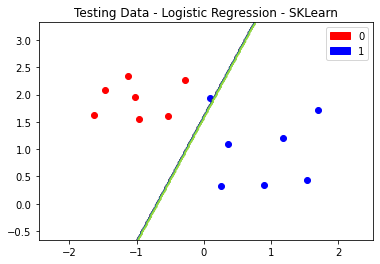

In [79]:
x_min , x_max = X_trn[:,0].min() - 0.5 , X_trn[:,0].max() + 0.5
y_min , y_max = X_trn[:,1].min() - 0.5 , X_trn[:,1].max() + 0.5
h = 0.02

xx,yy = np.meshgrid(np.arange(x_min,x_max,h) , np.arange(y_min,y_max,h))
Z = model.predict(np.c_[xx.ravel() , yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z )

for a,class_pt in zip(X_tst , Y_tst):
    if class_pt == 1:
        plt.scatter(a[0] , a[1] , color = 'blue')
    else:
        plt.scatter(a[0] , a[1] , color = 'red' )
        
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
plt.legend(handles = [red_patch , blue_patch])
plt.title("Testing Data - Logistic Regression - SKLearn")

**We can see that the classification error on both the training data
and testing data are exactly the same in both Question 7 and Question 8. They have values of 0.031746031746031744 for training data and 0.0714285714285714 for testing data. This means that it is highly likely that the learning rate and number of iterations performed in the Scikit-Learn Logistic regression and the Logistic Regression function we defined must be the same or very close to each other.**

**Naive Bayes Classifier**

In [65]:
gnb = GaussianNB()
model_NB = gnb.fit(X_trn , Y_trn.ravel())

In [68]:
print("Classification Error on Testing Data is: ",
      1 - model_NB.score(X_tst , Y_tst))

Classification Error on Testing Data is:  0.0714285714285714


In [70]:
print("Classification Error on Training Data is: ",
      1 - model_NB.score(X_trn , Y_trn))

Classification Error on Training Data is:  0.023809523809523836


We can see that the classification error is the same as that for both Question 7 and Question 8a. This is because only 1 point is misclassified from each of the models. We might see slightly different results if we had more test data.

**Decision Boundary for Naive Bayes Classifier**

Text(0.5, 1.0, 'Testing Data - Naive Bayes Classifier - SKLearn')

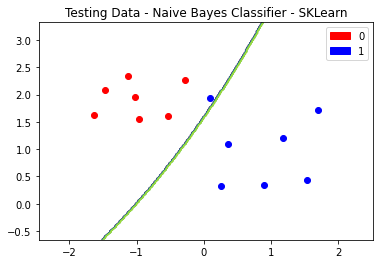

In [80]:
Z1 = model_NB.predict(np.c_[xx.ravel() , yy.ravel()])
Z1 = Z1.reshape(xx.shape)
plt.contour(xx, yy, Z1)

for a,class_pt in zip(X_tst , Y_tst):
    if class_pt == 1:
        plt.scatter(a[0] , a[1] , color = 'blue')
    else:
        plt.scatter(a[0] , a[1] , color = 'red' )
        
red_patch = mpatches.Patch(color='red', label='0')
blue_patch = mpatches.Patch(color='blue', label='1')
plt.legend(handles = [red_patch , blue_patch])
plt.title("Testing Data - Naive Bayes Classifier - SKLearn")